In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Define dataset paths (Change as per your dataset structure)
train_dir = "vehicle_dataset/train/"
val_dir = "vehicle_dataset/val/" 
test_dir = "vehicle_dataset/test/" 

In [3]:
# Define ImageDataGenerator for augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=5, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load dataset
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=16, class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=16, class_mode='categorical')

# Get the number of classes
num_classes = len(train_data.class_indices)

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

Found 5203 images belonging to 12 classes.
Found 164 images belonging to 12 classes.


C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15


C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


326/326 ━━━━━━━━━━━━━━━━━━━━ 168s 509ms/step - accuracy: 0.1811 - loss: 2.5234 - val_accuracy: 0.3354 - val_loss: 2.3919
Epoch 2/15
326/326 ━━━━━━━━━━━━━━━━━━━━ 157s 478ms/step - accuracy: 0.4593 - loss: 1.6093 - val_accuracy: 0.4207 - val_loss: 2.1000
Epoch 3/15
326/326 ━━━━━━━━━━━━━━━━━━━━ 156s 474ms/step - accuracy: 0.5555 - loss: 1.2956 - val_accuracy: 0.4817 - val_loss: 1.7504
Epoch 4/15
326/326 ━━━━━━━━━━━━━━━━━━━━ 158s 479ms/step - accuracy: 0.6458 - loss: 1.0815 - val_accuracy: 0.4939 - val_loss: 1.7173
Epoch 5/15
326/326 ━━━━━━━━━━━━━━━━━━━━ 157s 478ms/step - accuracy: 0.6996 - loss: 0.9074 - val_accuracy: 0.4695 - val_loss: 1.7628
Epoch 6/15
326/326 ━━━━━━━━━━━━━━━━━━━━ 157s 477ms/step - accuracy: 0.7389 - loss: 0.8139 - val_accuracy: 0.5488 - val_loss: 1.8166
Epoch 7/15
326/326 ━━━━━━━━━━━━━━━━━━━━ 158s 481ms/step - accuracy: 0.7699 - loss: 0.6864 - val_accuracy: 0.5732 - val_loss: 1.5351
Epoch 8/15
326/326 ━━━━━━━━━━━━━━━━━━━━ 155s 472ms/step - accuracy: 0.7840 - loss: 0.64

In [5]:
# Save model
model.save("vehicle_classifier.h5")

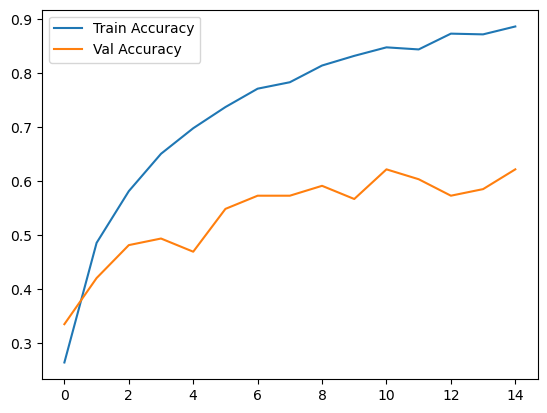

In [6]:
# Plot training performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()